# Collect all histology images
Walks paths of histology folder, showing all available histology images
Will only run on internal AIBS computers with /olsenlab1 NAS drive mapped

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import glob

import seaborn as sns

import imageio

import visual_behavior.plotting as vbp

# add the top level directory to allow it to be imported
import sys
sys.path.append(os.path.split(os.getcwd())[0])
from utilities import plotting_utilities
from utilities import helper_functions

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
data_path = os.path.join(os.path.split(os.getcwd())[0],'data')
session_list = pd.read_csv(os.path.join(os.path.join(data_path,'session_list.csv')))
mouse_ids = session_list['mouse_id'].unique()

In [5]:
len(mouse_ids)

11

## some simple functions to walk down a directory and open and plot all images

In [39]:
def plot_image(mouse_id, path):
    fig,ax=plt.subplots()
    im = imageio.imread(path)
    ax.imshow(im)
    ax.set_title('{}\n{}'.format(mouse_id, path))

def plot_all_images(mouse_id):
    histology_loc = '/olsenlab1/data/endoscope_imaging/Histology'
    path = os.path.join(histology_loc, mouse_id)
    for root, dirs, files in os.walk(path, topdown=False):
        jpg_files = glob.glob(os.path.join(root,'*c1+2.jpg'))
        tiff_files = glob.glob(os.path.join(root,'*c1+2.tif'))
        for file in jpg_files:
            plot_image(mouse_id, os.path.join(root, file))
        for file in tiff_files:
            plot_image(mouse_id, os.path.join(root, file))

## all histology images for animals in study

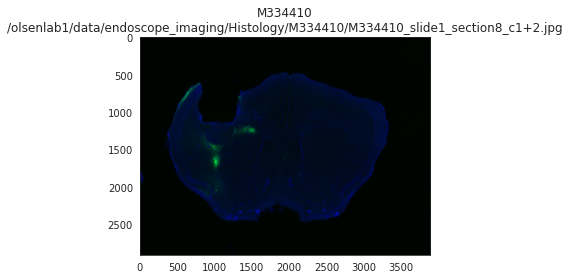

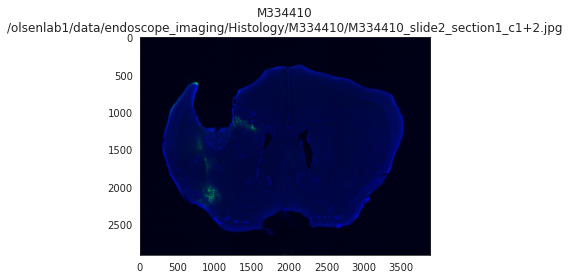

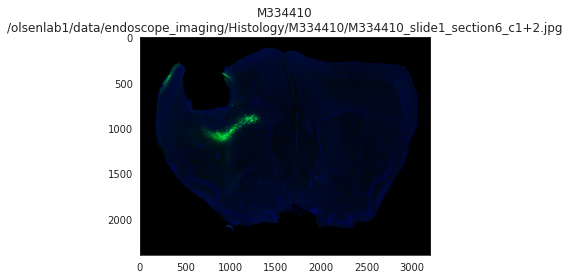

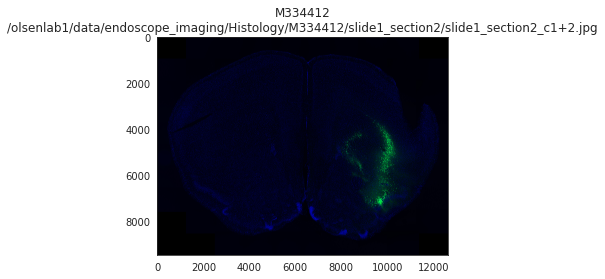

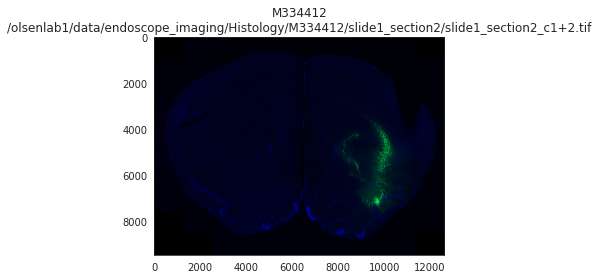

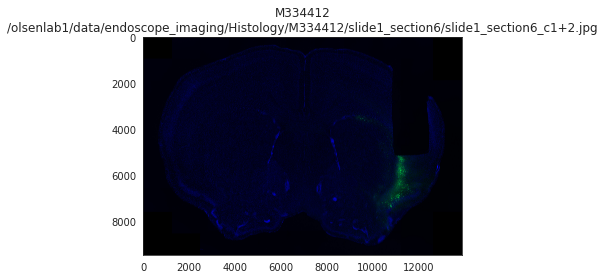

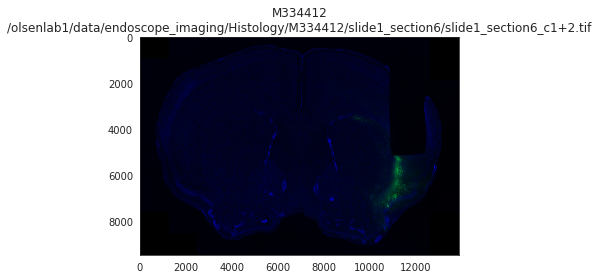

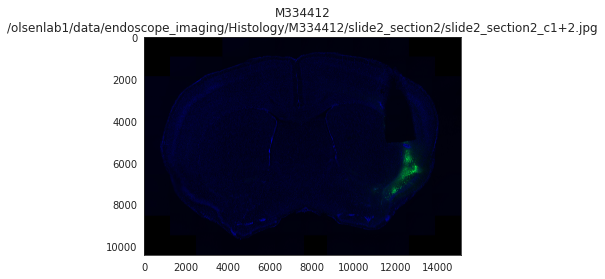

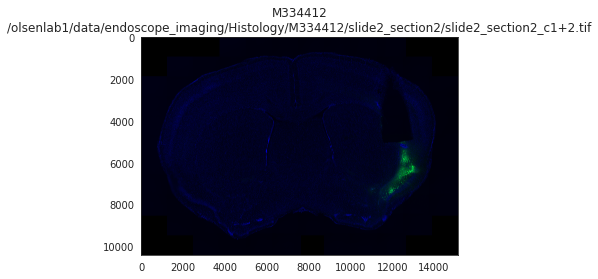

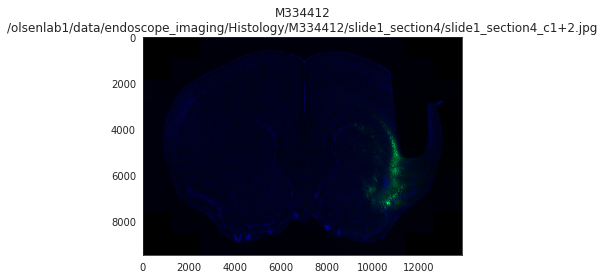

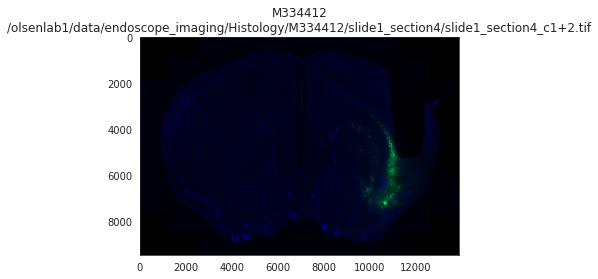

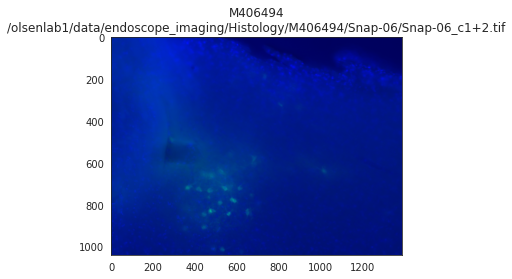

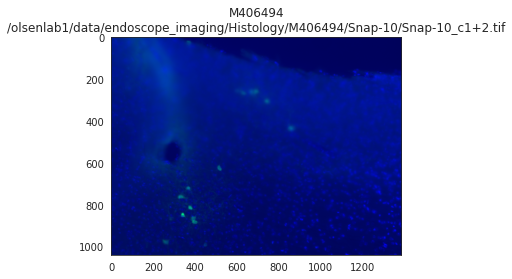

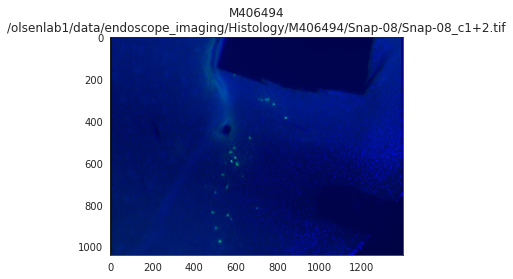

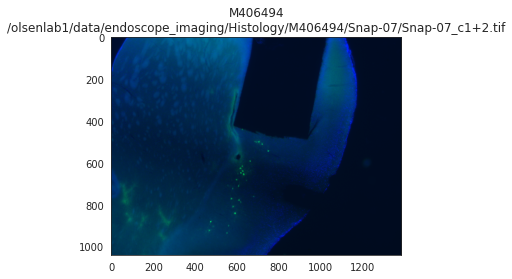

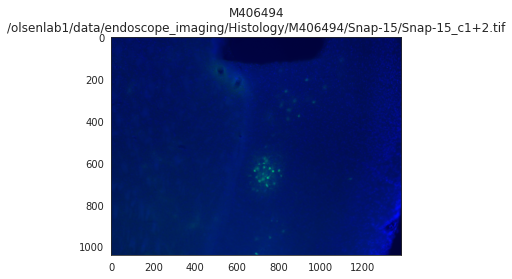

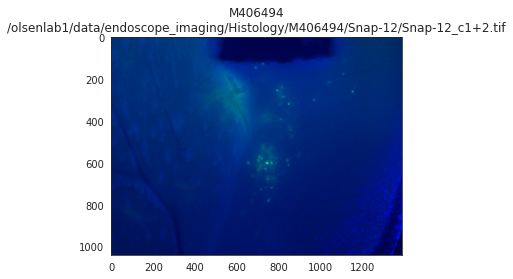

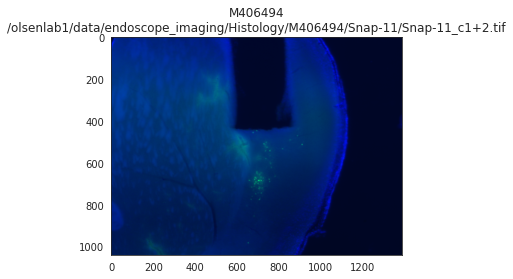

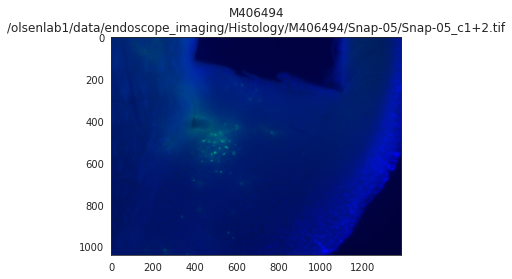

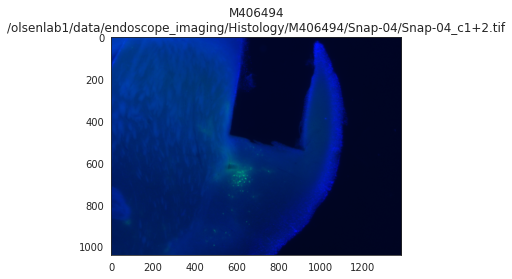

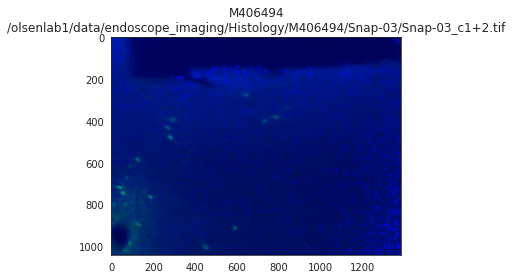

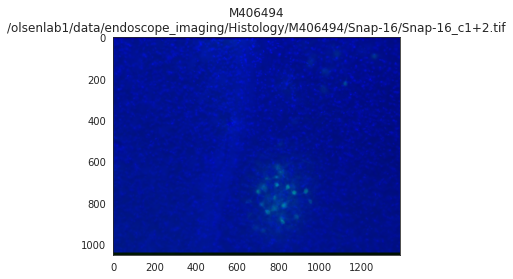

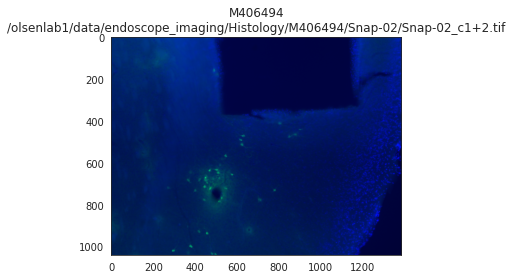

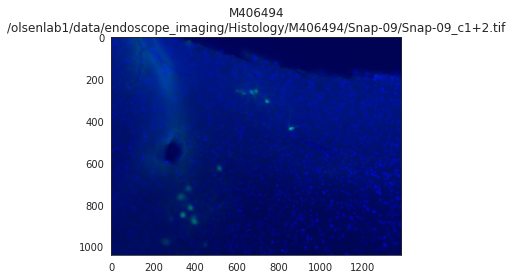

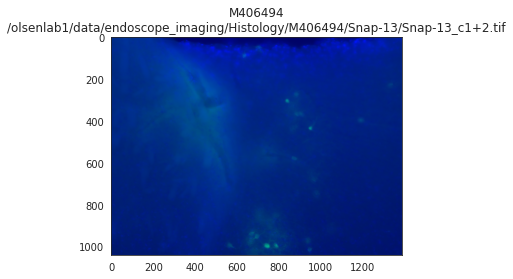

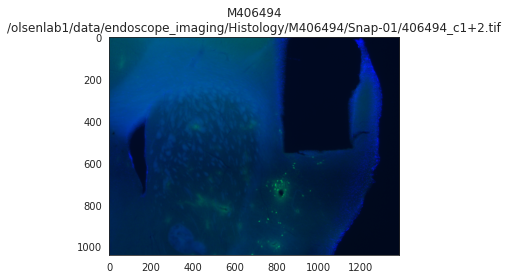

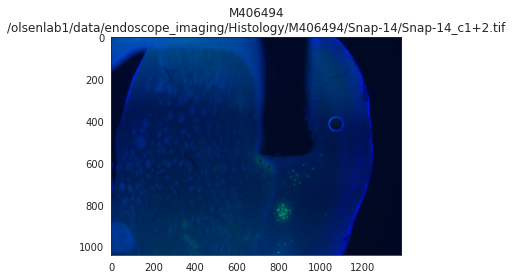

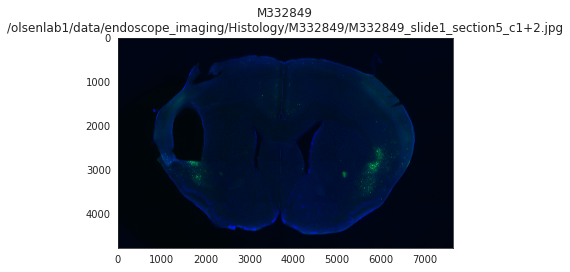

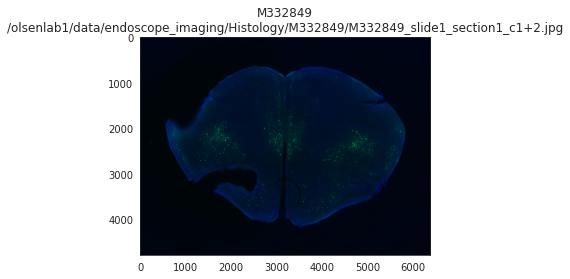

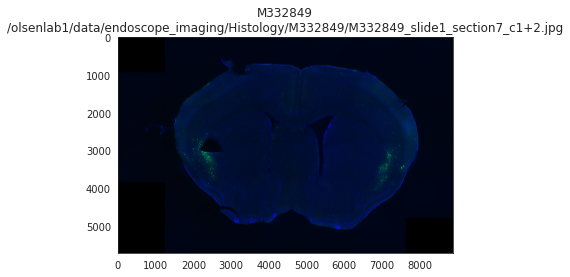

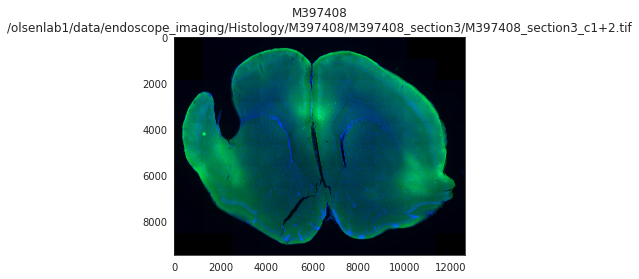

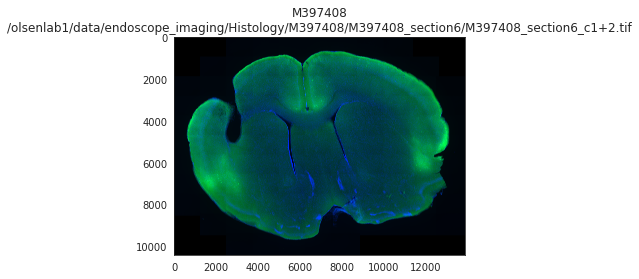

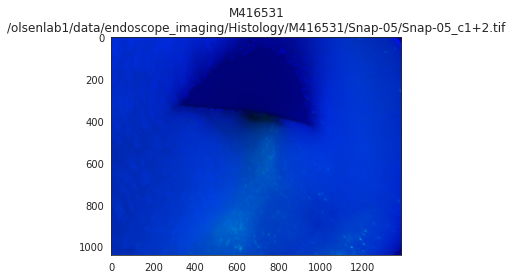

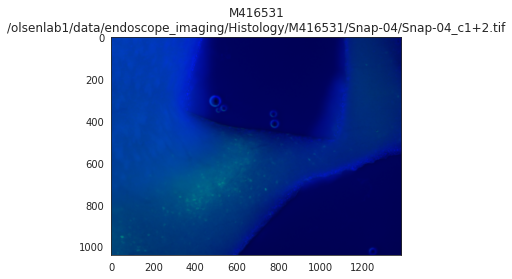

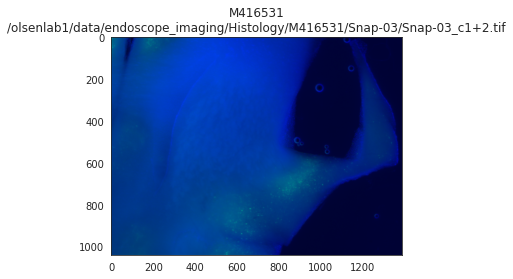

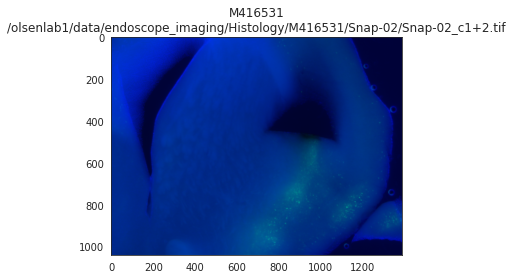

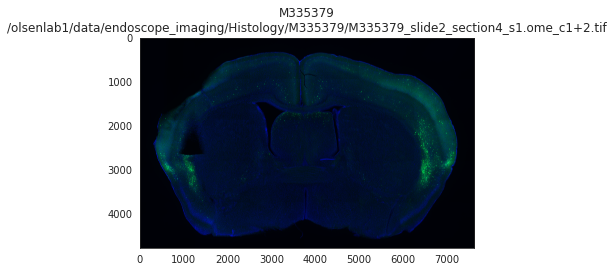

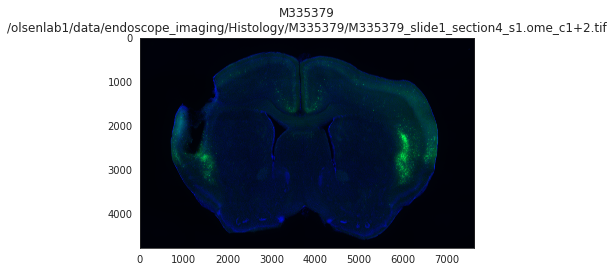

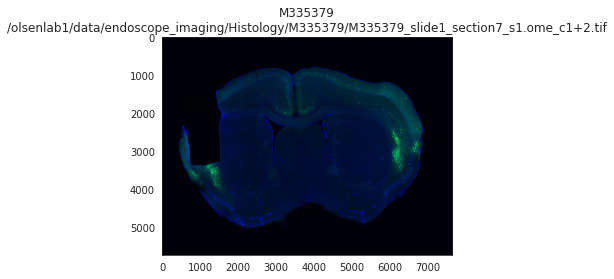

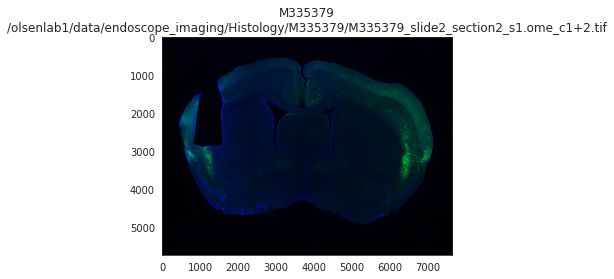

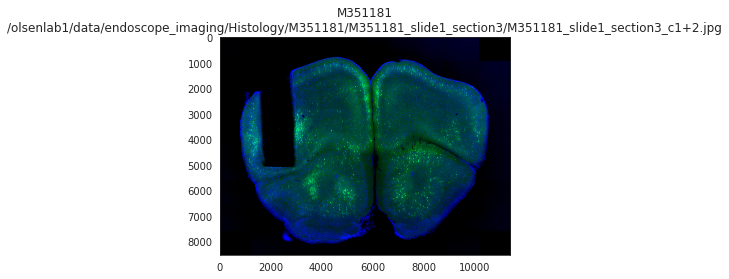

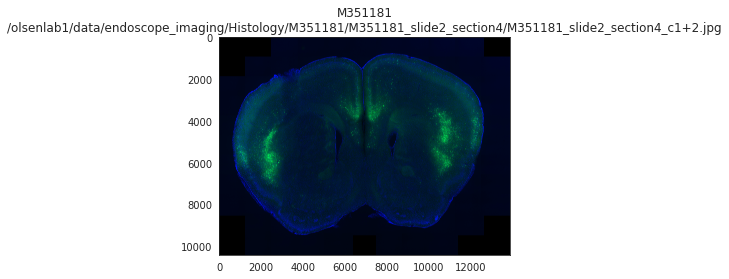

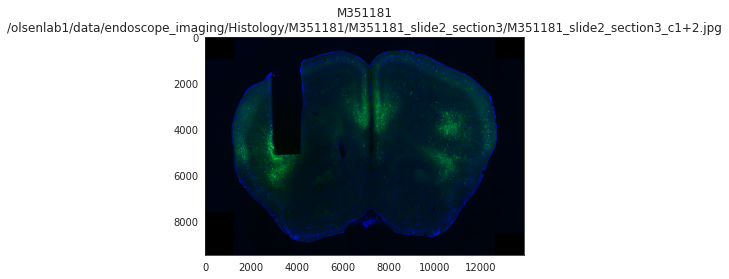

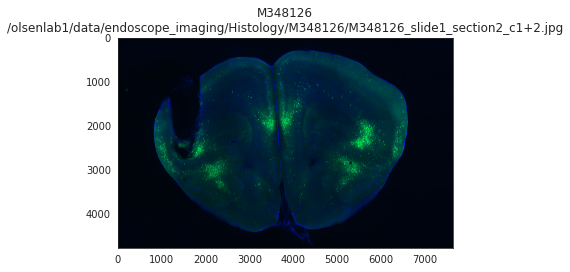

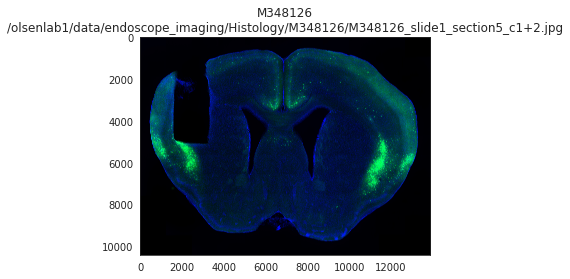

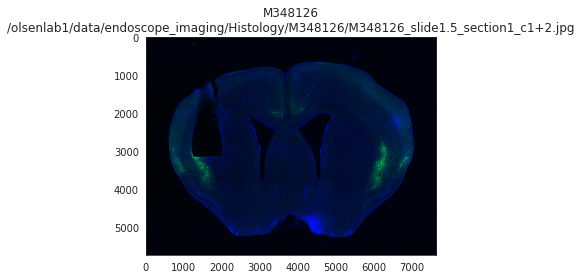

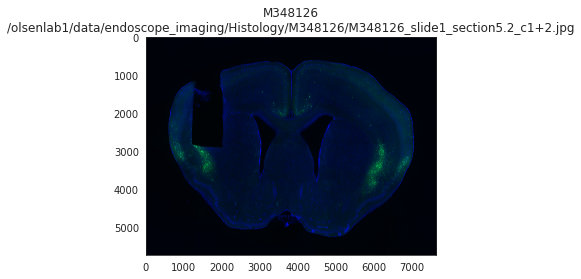

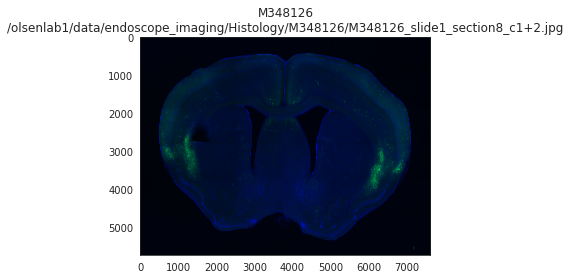

In [40]:
for mouse_id in mouse_ids:
    plot_all_images(mouse_id)